# Activity 1

In this activity we are going to create a basic model using the Keras library.
We will perform the same classification task as we did in Lesson 1. We will use the same bank dataset and attempt the predict the same variable.

To recap: in the last lesson we used a logistic regression model to predict whether a client would subscribe to a given product given various attributes of each client such as their age and occupation.

In this Lesson we will introduce the Keras library though let's not forget that we can and still use the libraries we used previously, such as pandas for easy loading in of data, and sklearn for any data preprocessing and model evaluation metrics.

First, we can begin by loading in data. We will use the same dataset that we processed in the first Lesson.

In [1]:
import pandas as pd
feats = pd.read_csv('bank_data_feats.csv')
target = pd.read_csv('bank_data_target.csv')

We can begin by creating a test set from which we use to evaluate any models we train on.
We cxan use the `train_test_split` function that we used in the first lesson.

In [2]:
from sklearn.model_selection import train_test_split
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=test_size, random_state=random_state)

A sequential model is a model that consists of a linear stack of layers.

We can create our model by adding the various model components as a list argument to the model, or we could use the `add` method of the `Sequential` class to sequentially add components to the model.

Let's start by initailizing a sequential model.

In [3]:
from keras.models import Sequential
model = Sequential()

/Users/moocarmm/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


For each layer of the model, we need to specify the dimensions that each layer expects.
We will start with a dense layer, which is a fully-connected layer. The result of the dense layer is the dot product of the input and the weights of the layer.

If an activation argument is passed to the `Dense` function, an activation function is applied to the result of the dot product.

Our input shape dimension represents the number of nodes in the layer, here this corresponds to our expected output, for binary classification is one.

In [4]:
from keras.layers import Dense
model.add(Dense(1, input_dim=X_train.shape[1]))

A logistic regression model is the dot product of a weight matrix and an input matrix followed by the logistic, or sigmoid activation function.

We already have the dot product compoenet of the logistic regression model. To complete the model we have to add the sigmoid activation function. This could have been achieved directly in the `Dense` function, but can also be added afterwards.

The activation compenent returns the output of the function applied on the input matrix.

In [5]:
from keras.layers import Activation
model.add(Activation('sigmoid'))

Before a model is trained the model the learning process needs to be configured. This includes which optimiser to use and which loss function to minimize in the learning process. 

To configure the learning process we have to use the `compile` method for the model.

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

We can print a summary of the model.

In [7]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 34        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________
None


We can see the two components of the model that we have added, the dense layer and the sigmoid activation function. We can also see the output dimensions for each component. The output for the dense layer is `(None, 1)`, the first value is `None` because it can take any value and depends on the size of the training data or if the training data is batched then the batch size. For example if there are 4000 observations in the training data, the output shape would be (4000, 1), but since we haven't fed any data into the model the `None` placeholder is used.

Next, we can fit the model to the training data. Here we can define the number of epochs we want to train for, as well as the proportion we wish to use for validation to evaluate after every epoch.

In [8]:
history = model.fit(X_train, y_train['y'], epochs=10, validation_split=0.2)

Train on 2892 samples, validate on 724 samples
Epoch 1/10
2892/2892 [==============================] - 0s 138us/step - loss: 13.0397 - acc: 0.1770 - val_loss: 12.8816 - val_acc: 0.1823
Epoch 2/10
2892/2892 [==============================] - 0s 59us/step - loss: 12.1108 - acc: 0.2317 - val_loss: 11.6105 - val_acc: 0.2583
Epoch 3/10
2892/2892 [==============================] - 0s 60us/step - loss: 10.4097 - acc: 0.3320 - val_loss: 7.8691 - val_acc: 0.4848
Epoch 4/10
2892/2892 [==============================] - 0s 59us/step - loss: 4.0138 - acc: 0.7393 - val_loss: 1.7964 - val_acc: 0.8881
Epoch 5/10
2892/2892 [==============================] - 0s 62us/step - loss: 1.9761 - acc: 0.8769 - val_loss: 1.7908 - val_acc: 0.8881
Epoch 6/10
2892/2892 [==============================] - 0s 60us/step - loss: 1.9695 - acc: 0.8769 - val_loss: 1.7803 - val_acc: 0.8895
Epoch 7/10
2892/2892 [==============================] - 0s 59us/step - loss: 1.9626 - acc: 0.8772 - val_loss: 1.7803 - val_acc: 0.8895
Ep

### Plotting error with epoch

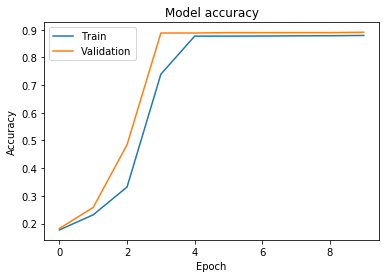

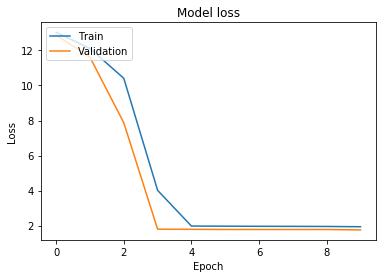

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

We can see that the accuracy increases with every epoch, and the loss decreases with every epoch, and begins to converges.

We can also see that the validation set performs slightly better than the training set which is unexpected but not unwelcome.

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test['y'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

905/905 [==============================] - 0s 25us/step
The loss on the test set is 1.8143 and the accuracy is 88.729%
